### Load Data & Import Libraries

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.display import display

from typing import List, Tuple
import pickle

In [240]:
# !pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# fetch dataset
# steel_industry_energy_consumption = fetch_ucirepo(id=851)

# data (as pandas dataframes)
# X = steel_industry_energy_consumption.data.features
# y = steel_industry_energy_consumption.data.targets

# df = X.copy()
# df['Load_Type'] = y.copy()
# df.to_csv('steel_industry_energy_consumption.csv')

df = pd.read_csv('steel_industry_energy_consumption.csv')

### Data Preparation

In [241]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Usage_kWh,3.17,4.0,3.24,3.31,3.82
Lagging_Current_Reactive.Power_kVarh,2.95,4.46,3.28,3.56,4.5
Leading_Current_Reactive_Power_kVarh,0.0,0.0,0.0,0.0,0.0
CO2(tCO2),0.0,0.0,0.0,0.0,0.0
Lagging_Current_Power_Factor,73.21,66.77,70.28,68.09,64.72
Leading_Current_Power_Factor,100.0,100.0,100.0,100.0,100.0
NSM,900,1800,2700,3600,4500
WeekStatus,Weekday,Weekday,Weekday,Weekday,Weekday
Day_of_week,Monday,Monday,Monday,Monday,Monday


In [242]:
del df['Unnamed: 0']

In [243]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,NaN,NaN,NaN,27.386892,33.44438,0.0,3.2,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,NaN,NaN,NaN,13.035384,16.306,0.0,2.3,5.0,22.64,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,NaN,NaN,NaN,3.870949,7.424463,0.0,0.0,0.0,2.09,27.76
CO2(tCO2),35040.0,NaN,NaN,NaN,0.011524,0.016151,0.0,0.0,0.0,0.02,0.07
Lagging_Current_Power_Factor,35040.0,NaN,NaN,NaN,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.0
Leading_Current_Power_Factor,35040.0,NaN,NaN,NaN,84.36787,30.456535,0.0,99.7,100.0,100.0,100.0
NSM,35040.0,NaN,NaN,NaN,42750.0,24940.534317,0.0,21375.0,42750.0,64125.0,85500.0
WeekStatus,35040,2,Weekday,25056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_week,35040,7,Monday,5088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Load_Type,35040,3,Light_Load,18072,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# Convert columns name to lowercase and replace period to underscore
df.columns = df.columns.str.lower().str.replace(".", "_")

del df['weekstatus']

# Get categorical columns name
categorical = list(df.dtypes[(df.dtypes == 'object')].index)

# Convert columns value to lowercase
for col in categorical:
    df[col] = df[col].str.lower()

# Get numerical columns name
numerical = list(df.dtypes[(df.dtypes != 'object')].index)



numerical, categorical

(['usage_kwh',
  'lagging_current_reactive_power_kvarh',
  'leading_current_reactive_power_kvarh',
  'co2(tco2)',
  'lagging_current_power_factor',
  'leading_current_power_factor',
  'nsm'],
 ['day_of_week', 'load_type'])

### Exploratory Data Analysis

In [245]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
usage_kwh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
lagging_current_reactive_power_kvarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
leading_current_reactive_power_kvarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
co2(tco2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
lagging_current_power_factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
leading_current_power_factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
nsm,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [246]:
df[categorical].describe().T

,count,unique,top,freq
day_of_week,35040,7,monday,5088
load_type,35040,3,light_load,18072


In [247]:
for col in categorical:
    print(f'{col}: {set(df[col])}')
    print()

day_of_week: {'saturday', 'thursday', 'friday', 'sunday', 'tuesday', 'monday', 'wednesday'}

load_type: {'light_load', 'maximum_load', 'medium_load'}



In [248]:
for col in categorical:
    display(df[col].value_counts(normalize=True))
    print()

day_of_week
monday       0.145205
tuesday      0.142466
wednesday    0.142466
thursday     0.142466
friday       0.142466
saturday     0.142466
sunday       0.142466
Name: proportion, dtype: float64

load_type
light_load      0.515753
medium_load     0.276712
maximum_load    0.207534
Name: proportion, dtype: float64

In [249]:
sns.set(font_scale=0.8)

<Axes: >

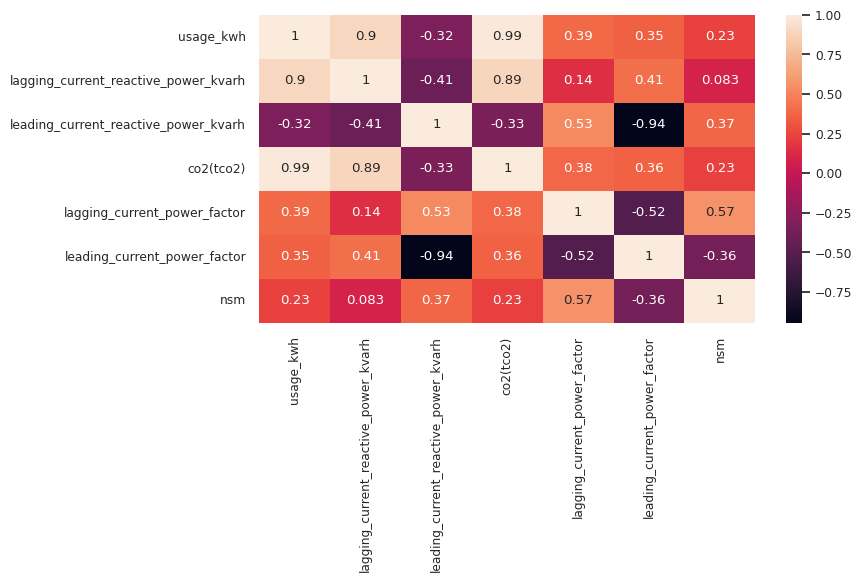

In [250]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[numerical].corr(), annot=True)

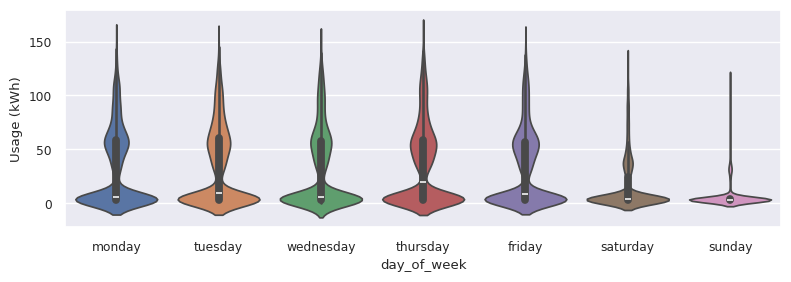

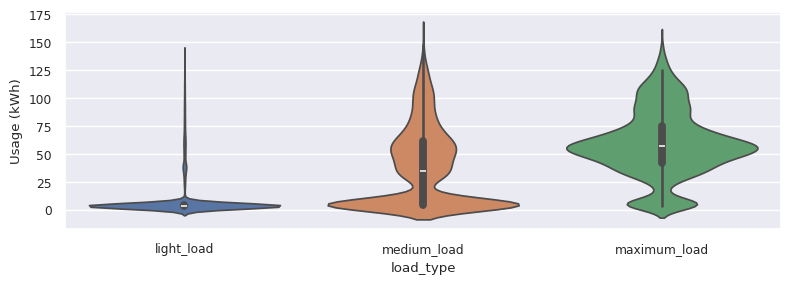

In [251]:
for i, col in enumerate(categorical):
    plt.figure(figsize=(8, 8))
    plt.subplot(3, 1, i+1)
    sns.violinplot(data=df, x=col, y="usage_kwh", hue=col)
    plt.xlabel(col)
    plt.ylabel("Usage (kWh)")
    plt.tight_layout()
    plt.show()

In [252]:
df.head().T

,0,1,2,3,4
usage_kwh,3.17,4.0,3.24,3.31,3.82
lagging_current_reactive_power_kvarh,2.95,4.46,3.28,3.56,4.5
leading_current_reactive_power_kvarh,0.0,0.0,0.0,0.0,0.0
co2(tco2),0.0,0.0,0.0,0.0,0.0
lagging_current_power_factor,73.21,66.77,70.28,68.09,64.72
leading_current_power_factor,100.0,100.0,100.0,100.0,100.0
nsm,900,1800,2700,3600,4500
day_of_week,monday,monday,monday,monday,monday
load_type,light_load,light_load,light_load,light_load,light_load


<Axes: xlabel='usage_kwh', ylabel='Count'>

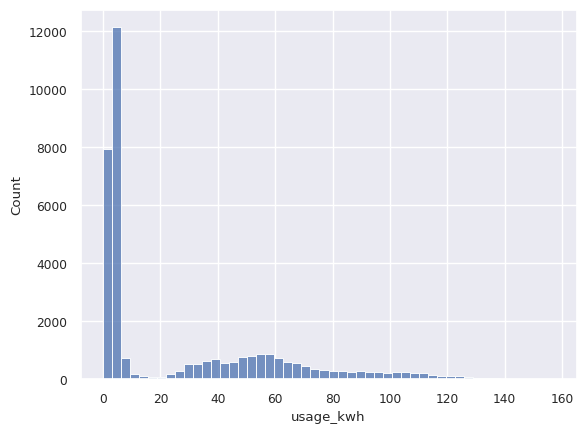

In [253]:
sns.histplot(x=df['usage_kwh'], bins=50)

### Validation Framework

In [254]:
np.random.seed(8)

n = df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

data_copy = df.copy()
df_train = data_copy.iloc[idx[:n_train]].reset_index(drop=True)
df_val = data_copy.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = data_copy.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = df_train['usage_kwh'].values
y_val = df_val['usage_kwh'].values
y_test = df_test['usage_kwh'].values

del df_train['usage_kwh']
del df_val['usage_kwh']
del df_test['usage_kwh']



### Feature Engineering

In [255]:
numerical = [col for col in numerical if col != 'usage_kwh']
numerical

['lagging_current_reactive_power_kvarh',
 'leading_current_reactive_power_kvarh',
 'co2(tco2)',
 'lagging_current_power_factor',
 'leading_current_power_factor',
 'nsm']

In [256]:
dicts_cat = {}
for col in categorical:
    dicts_cat[col] = df[col].value_counts().sort_values().index.to_list()

In [257]:
def prepare_X(data: pd.DataFrame) -> np.ndarray:
    X = data.copy()

    if 'object' in X.dtypes.values:
        for k, v in dicts_cat.items():
            for value in v:
                X[f'{k}={value}'] = (X[k] == value).astype(int)
            del X[k]

    return X.values

### Train Data

In [258]:
def train_linear_regression(X: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XTX = np.dot(X.T, X)
    # XTX = XTX + 0.001 * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y
    return w_full[0], w_full[1:]

In [259]:
def rmse(y_act, y_pred):
    se = (y_act - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### *Train using only numerical features*

intercept
-13.465667237108395

coef
[3.03970258e-01 1.35874524e-01 1.68417253e+03 1.26582528e-01
 7.52873133e-02 9.49479004e-06]

rmse: 5.055690703761736


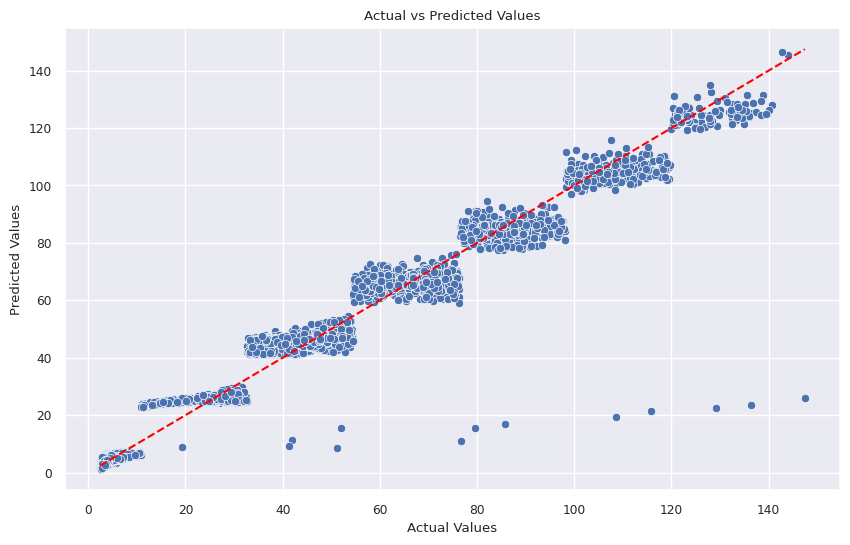

In [260]:
X_train = prepare_X(df_train[numerical])
intercept, coef = train_linear_regression(X_train, y_train)
y_train_pred = intercept + np.dot(X_train, coef)

X_val = prepare_X(df_val[numerical])
y_val_pred = intercept + X_val.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_val, y_val_pred)}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

# with open('lr_model_num_features.pickle', 'wb') as f:
#    pickle.dump((intercept, coef), f)


#### *Train using numerical + categorical features*

intercept
-1.1868868269327408e+16

coef
[-2.12786743e+00 -7.72022013e+00  3.08519688e+03  9.65238877e-01
 -1.52898061e+00 -3.40106832e-04  1.18688683e+16  1.18688683e+16
  1.18688683e+16  1.18688683e+16  1.18688683e+16  1.18688683e+16
  1.18688683e+16 -8.67979828e+00 -2.26304810e+00 -7.02006561e+00]

rmse: 123.22534886770397


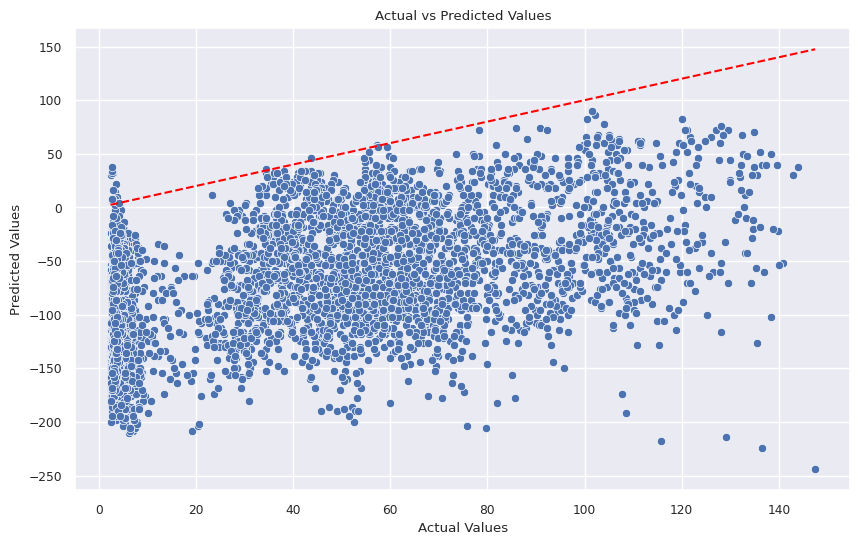

In [ ]:
X_train = prepare_X(df_train)

intercept, coef = train_linear_regression(X_train, y_train)
y_train_pred = intercept + np.dot(X_train, coef)

X_val = prepare_X(df_val)
y_val_pred = intercept + X_val.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_val, y_val_pred)}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()


# with open('lr_model_full_features.pickle', 'wb') as f:
#    pickle.dump((intercept, coef), f)

### Regularization

In [262]:
# training function with regularization
def train_linear_regression_reg(X: np.ndarray, y: np.ndarray, alpha: float) -> Tuple[float, np.ndarray]:
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XTX = np.dot(X.T, X)
    XTX = XTX + alpha * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y

    return w_full[0], w_full[1:]

In [263]:
alphas = [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]
rmses = []

for alpha in alphas:
    X_train = prepare_X(df_train)
    intercept, coef = train_linear_regression_reg(X_train, y_train, alpha)
    
    X_val = prepare_X(df_val)
    y_val_pred = intercept + X_val.dot(coef)

    rmses.append(rmse(y_val, y_val_pred))
    
    # print('%06s %f' % (alpha, rmse(y_val, y_val_pred)))
 
alpha_df = pd.DataFrame()
alpha_df['alpha_values'] = alphas
alpha_df['rmses'] = rmses
alpha_df = alpha_df.sort_values(by=['rmses']).reset_index(drop=True)

alpha_df

# with open('alpha_df.pickle', 'wb') as f:
#    pickle.dump(alpha_df, f)


intercept
-7.215187005621134

coef
[ 3.31471247e-01  6.45014932e-02  1.63308935e+03  1.23517342e-01
  6.09296669e-02 -3.32433761e-06 -5.79382335e-01 -1.14431209e+00
 -1.24838491e+00 -1.12875126e+00 -8.01350096e-01 -1.11791071e+00
 -1.19528472e+00 -2.08246388e+00 -1.56899134e+00 -3.56375548e+00]

rmse: 5.0232565940716025


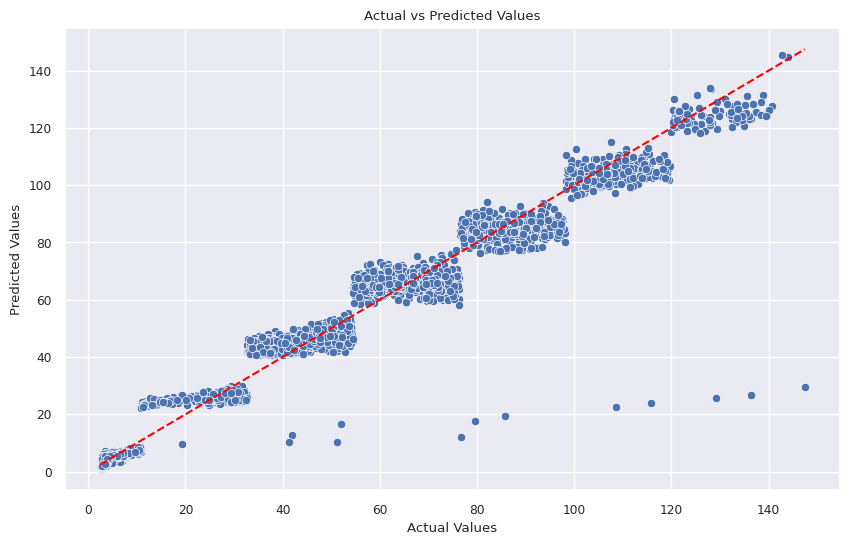

In [264]:
X_train = prepare_X(df_train)

intercept, coef = train_linear_regression_reg(X_train, y_train, 0.01)
y_train_pred = intercept + np.dot(X_train, coef)

X_val = prepare_X(df_val)
y_val_pred = intercept + X_val.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_val, y_val_pred)}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.show()

# with open('lr_model_regularized.pickle', 'wb') as f:
#    pickle.dump((intercept, coef), f)

### Using Model

intercept
-7.526266315878296

coef
[ 3.36896920e-01  6.75093160e-02  1.62782578e+03  1.26728899e-01
  6.27194013e-02 -2.75079490e-06 -5.52737678e-01 -1.13994218e+00
 -1.31866173e+00 -1.21263455e+00 -8.69636663e-01 -1.17886541e+00
 -1.25294207e+00 -2.18952198e+00 -1.72560566e+00 -3.61103296e+00]

rmse: 4.371691651099035


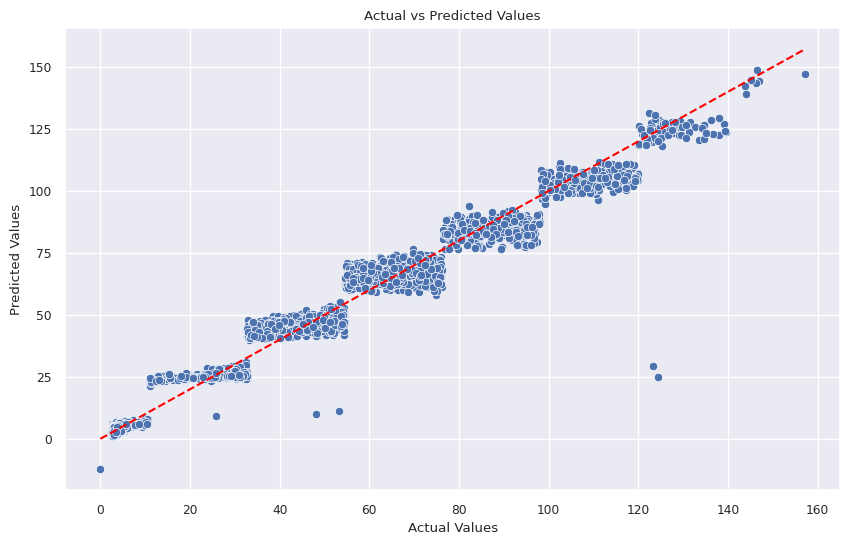

In [265]:
df_train_full = pd.concat([df_train, df_val])
df_train_full = df_train_full.reset_index(drop=True)

y_train_full = np.concat((y_train, y_val))


X_train_full = prepare_X(df_train_full)

intercept, coef = train_linear_regression_reg(X_train_full, y_train_full, 0.01)

X_test = prepare_X(df_test)
y_test_pred = intercept + X_test.dot(coef)

print('intercept')
print(f'{intercept}')
print()
print('coef')
print(f'{coef}')
print()
print(f'rmse: {rmse(y_test, y_test_pred)}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# with open('lr_model_regularized_full.pickle', 'wb') as f:
#    pickle.dump((intercept, coef), f)


In [266]:
df_small = df_test.iloc[26:27]
X_small = prepare_X(df_test.iloc[26:27])
y_small = y_test[26]
y_small_test = round(intercept + X_small.dot(coef)[0], 2)

X_small, y_small, y_small_test

(array([[1.483e+01, 0.000e+00, 2.000e-02, 9.580e+01, 1.000e+02, 5.310e+04,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]]),
 np.float64(49.57),
 np.float64(44.92))